In [22]:
# Credit Card Fraud Detection
# data downloaded from kaggle
# This dataset contains credit card transactions made by European cardholders in the year 2023. 
# It comprises over 550,000 records, and the data has been anonymized to protect the cardholders' identities. 
# The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions.


# Key Features

#id: Unique identifier for each transaction
#V1-V28: Anonymized features representing various transaction attributes (e.g., time, location, etc.)
#Amount: The transaction amount
#Class: Binary label indicating whether the transaction is fraudulent (1) or not (0)

# Potential Uses Caes
#Credit Card Fraud Detection: Build machine learning models to detect and prevent credit card fraud by identifying suspicious transactions based on the provided features.
#Merchant Category Analysis: Examine how different merchant categories are associated with fraud.
#Transaction Type Analysis: Analyze whether certain types of transactions are more prone to fraud than others.

In [3]:
import numpy as np
import pandas as pd
import sklearn 
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABLES = ['NORMAL', 'FRAUDS']

In [4]:
data = pd.read_csv(r"D:\Data Visualization\DataSet\creditcard_2023.csv")
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [17]:
data.tail()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1
568629,568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,...,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,21493.92,1


In [29]:
data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [40]:
data.shape

(568630, 31)

In [50]:
data.info


<bound method DataFrame.info of             id        V1        V2        V3        V4        V5        V6  \
0            0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898   
1            1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605   
2            2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481   
3            3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312   
4            4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549   
...        ...       ...       ...       ...       ...       ...       ...   
568625  568625 -0.833437  0.061886 -0.899794  0.904227 -1.002401  0.481454   
568626  568626 -0.670459 -0.202896 -0.068129 -0.267328 -0.133660  0.237148   
568627  568627 -0.311997 -0.004095  0.137526 -0.035893 -0.042291  0.121098   
568628  568628  0.636871 -0.516970 -0.300889 -0.144480  0.131042 -0.294148   
568629  568629 -0.795144  0.433236 -0.649140  0.374732 -0.244976 -0.603493   

              V7        V8     

In [59]:
# Exploratory Data analysis
data.isnull()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
568626,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
568627,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
568628,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


C:\Users\Pradi\AppData\Local\Temp\ipykernel_3024\3566870547.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort= True)


Text(0, 0.5, 'Frequency')

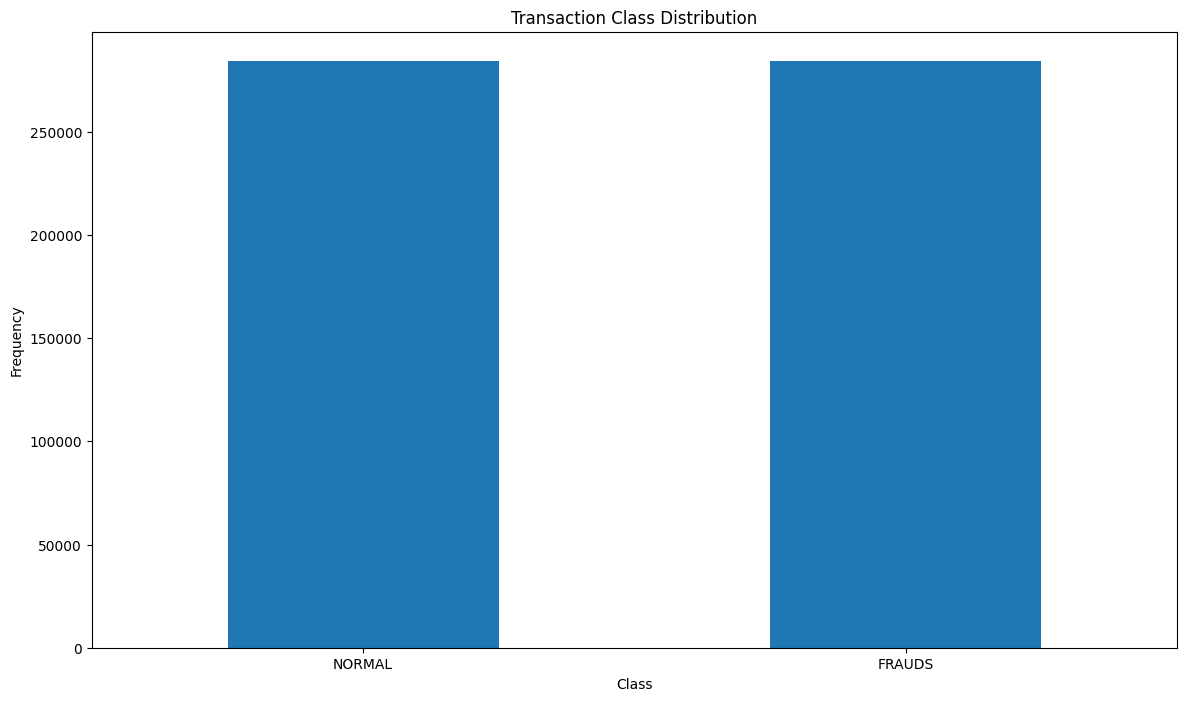

In [67]:
# How many number of classs are there with respect to frequency

count_classes = pd.value_counts(data['Class'], sort= True)
count_classes.plot(kind= 'bar', rot= 0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABLES)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [74]:
## Get the data , Normal and Frauds dataset

Normal = data[data['Class']==0]
Frauds = data[data['Class']==1]

In [80]:
print(Normal.shape, Frauds.shape)

(284315, 31) (284315, 31)


In [85]:

# More info on Amount of Noraml and Frauds

Frauds.Amount.describe()


count    284315.000000
mean      12057.601763
std        6909.750891
min          50.010000
25%        6074.640000
50%       12062.450000
75%       18033.780000
max       24039.930000
Name: Amount, dtype: float64

In [89]:
Normal.Amount.describe()

count    284315.000000
mean      12026.313506
std        6929.500715
min          50.120000
25%        6034.540000
50%       11996.900000
75%       18040.265000
max       24039.930000
Name: Amount, dtype: float64

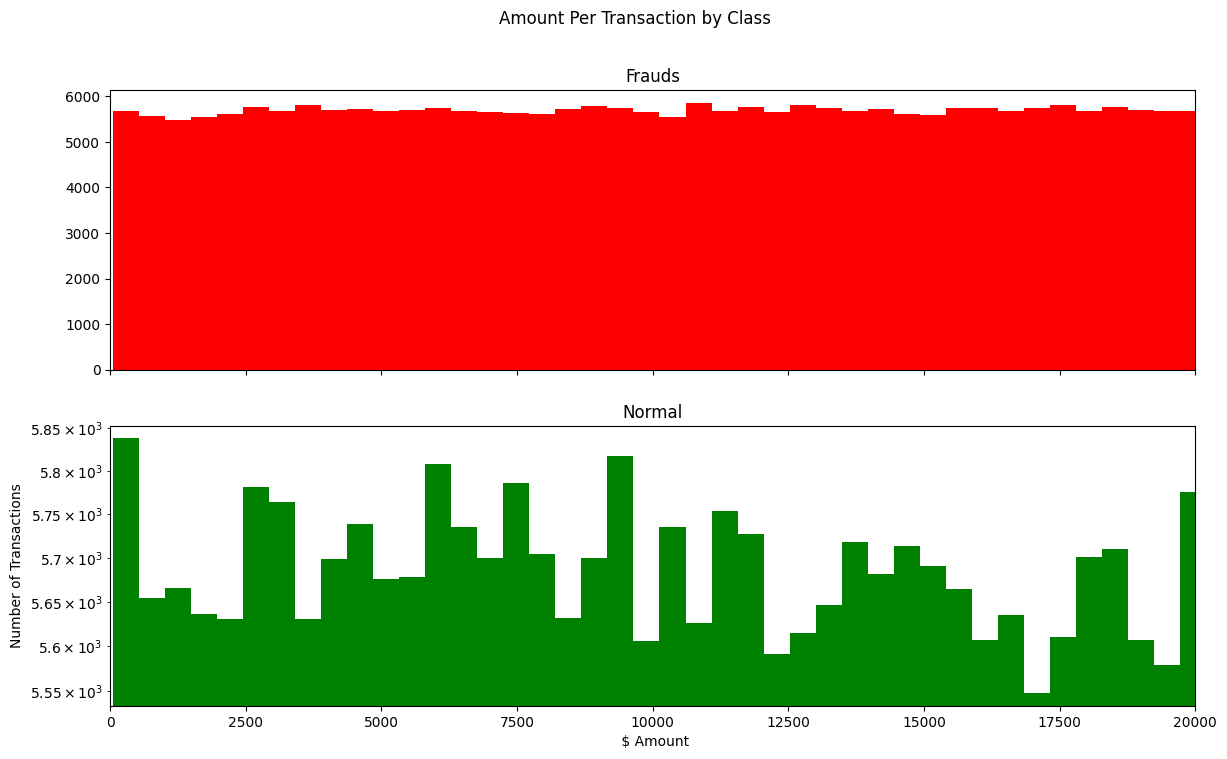

In [92]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
f.suptitle('Amount Per Transaction by Class')
bins = 50
ax1.hist(Frauds.Amount, bins=50, color='red')
ax1.set_title('Frauds')
ax2.hist(Normal.Amount, bins=50, color='green')
ax2.set_title('Normal')
plt.xlabel(' $ Amount')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();


AttributeError: 'DataFrame' object has no attribute 'Time'

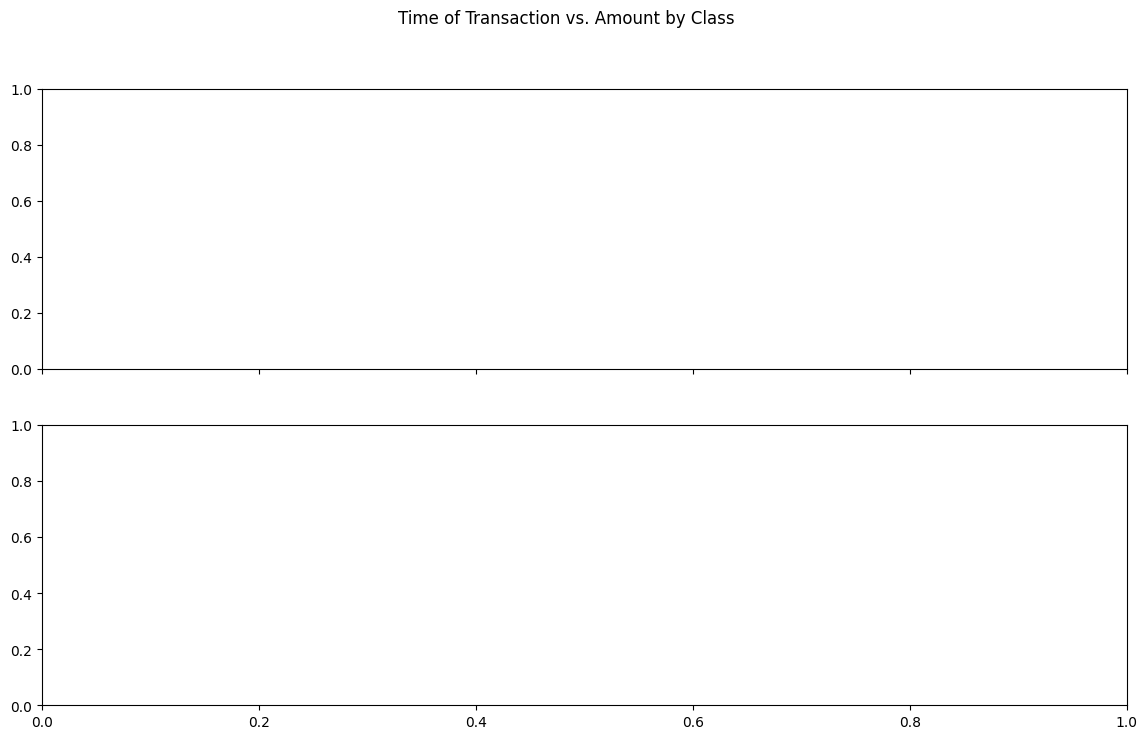

In [94]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of Transaction vs. Amount by Class')
ax1.scatter(Frauds.Time, Frauds.Amount, color='red', alpha=0.5)
ax1.set_title('Frauds')
ax1.set_ylabel('Amount ($)')
ax2.scatter(Normal.Time, Normal.Amount, color='green', alpha=0.5)
ax2.set_title('Normal')
ax2.set_ylabel('Amount ($)')
ax2.set_xlabel('Time (in Seconds)')
plt.xlim((0, None))
plt.show()

# My data set does not have a time attribute

In [95]:
##Determine the number of fraud and Normal Trans

outlier_fraction = len(Frauds) / float(len(Normal))
outlier_fraction


1.0

In [96]:
print("Frauds Cases : {}". format(len(Frauds)))
print("Normal Cases : {}". format(len(Normal))) 

Frauds Cases : 284315
Normal Cases : 284315


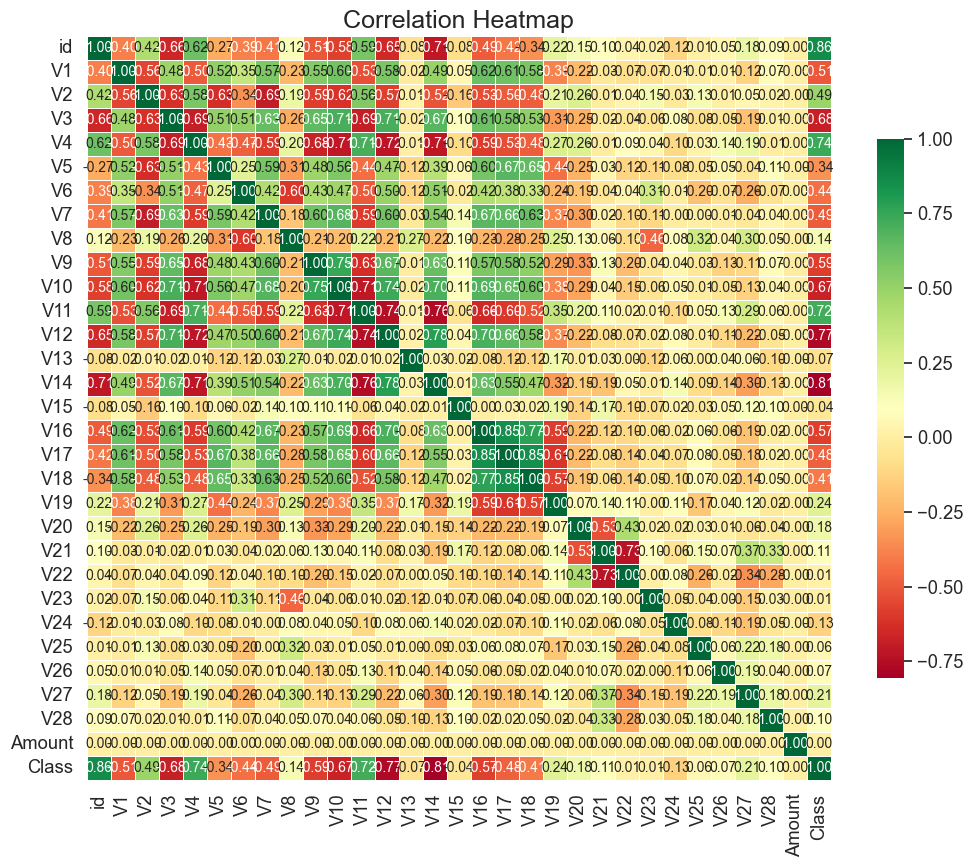

In [ ]:
cor = data.corr()
top_corr_features = cor.index
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

heatmap = sns.heatmap(data[top_corr_features].corr(), 
                      annot=True, 
                      cmap="RdYlGn",
                      fmt=".2f",
                      linewidths=0.5,
                      annot_kws={"size": 10},
                      cbar_kws={"shrink": 0.7},
                      square=True)
heatmap.set_title('Correlation Heatmap', fontsize=18)

plt.show()

In [ ]:
#Creating dependent and Independent Features

columns = data.columns.tolist()
#Filtering the columns to remove data we do not need
columns = [c for c in columns if c not in ["Class"]]

#Store the variable we are predicting
target = "Class"
#Definig a random state
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]

X_outliers = state.uniform(low = 0, high= 1, size=(X.shape[0], X.shape[1]))

#Print the shape of X and Y
print(X.shape)
print(Y.shape)


(568630, 30)
(568630,)


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# Assuming 'outlier_fraction' and 'state' have been defined
# Example values for 'outlier_fraction' and 'state'
outlier_fraction = 0.1  # Adjust this based on your data
state = np.random.RandomState(42)  # Assuming 'state' is already defined

classifiers = {
    "Isolation Forest": IsolationForest(n_estimators=100, max_samples=len(X),
                                        contamination=outlier_fraction, random_state=state, verbose=0),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                               leaf_size=30, metric='minkowski',
                                               p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine": OneClassSVM(kernel='rbf', degree=3, gamma=0.1, nu=0.05,
                                          max_iter=-1)  # Removed random_state
}

In [ ]:
type(classifiers)

dict

In [101]:
n_outliers = len(Frauds)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    # Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)

    # Reshape the prediction values to 0 for valid transactions and 1 for fraud transactions
    y_pred = np.where(y_pred == 1, 0, 1)
    y_pred = np.where(y_pred == -1, 1, y_pred)
    n_errors = (y_pred != Y).sum()

    # Run classification
    print('{}: {}'.format(clf_name, n_errors))
    print("Accuracy score:")
    print(accuracy_score(Y, y_pred))
    print("Classification Report:")
    print(classification_report(Y, y_pred))

Isolation Forest: 236292
Accuracy score:
0.5844538627930289
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.98      0.70    284315
           1       0.92      0.18      0.31    284315

    accuracy                           0.58    568630
   macro avg       0.73      0.58      0.51    568630
weighted avg       0.73      0.58      0.51    568630



KeyboardInterrupt: 

In [ ]:
n_outliers = len(Frauds)

# Create the SVM classifier
svm_classifier = classifiers["Support Vector Machine"]

# Fit the data and tag outliers
svm_classifier.fit(X)
y_pred_svm = svm_classifier.predict(X)

# Reshape the prediction values to 0 for valid transactions and 1 for fraud transactions
y_pred_svm = np.where(y_pred_svm == 1, 0, 1)
y_pred_svm = np.where(y_pred_svm == -1, 1, y_pred_svm)

# Print classification report
print("Support Vector Machine:")
print(classification_report(Y, y_pred_svm))